<a href="https://colab.research.google.com/github/Onlywasim/ITW_ML/blob/main/ITW_PBL_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB




In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


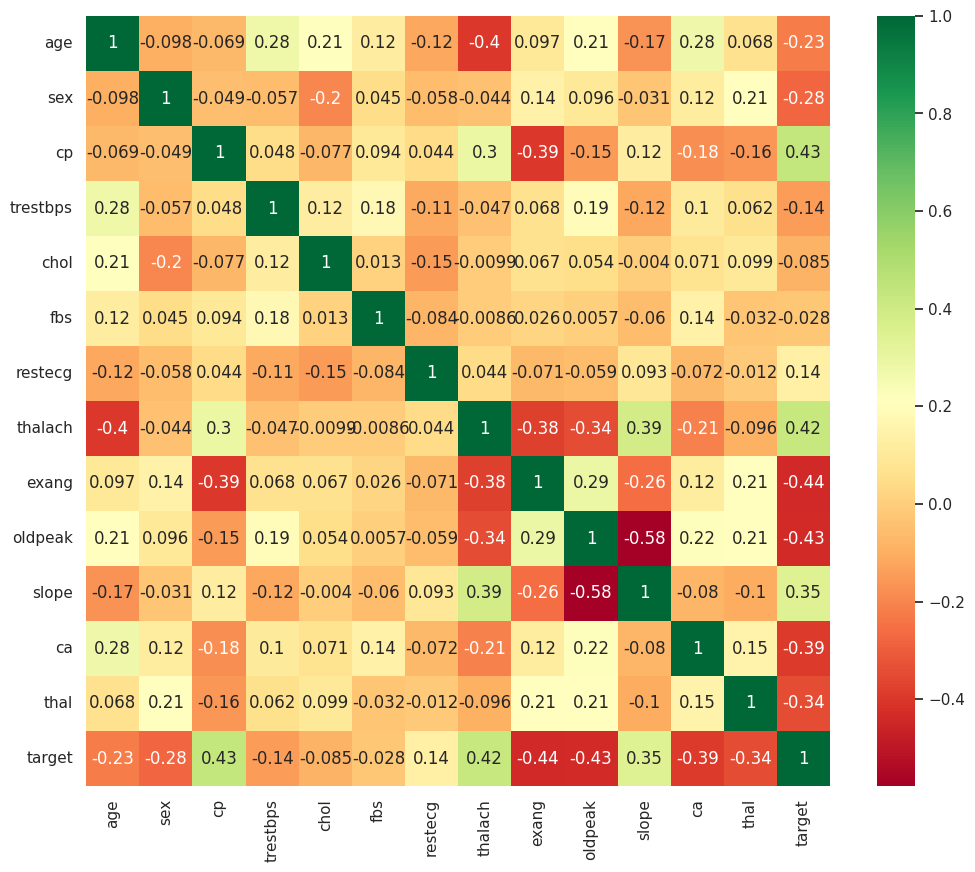

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(heart_data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
#printing null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:

# Replace '0' values with 'NaN'
heart_data[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']] = heart_data[['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].replace(0, pd.np.NaN)

# Calculate the median of each column
med_age = heart_data['age'].median()
med_sex = heart_data['sex'].median()
med_cp = heart_data['cp'].median()
med_trestbps = heart_data['trestbps'].median()
med_chol = heart_data['chol'].median()
med_fbs = heart_data['fbs'].median()
med_restecg = heart_data['restecg'].median()
med_thalach = heart_data['thalach'].median()
med_exang = heart_data['exang'].median()
med_oldpeak = heart_data['oldpeak'].median()
med_slope = heart_data['slope'].median()
med_ca = heart_data['ca'].median()
med_thal = heart_data['thal'].median()


# Replace 'NaN' values with the median values
heart_data['age'].fillna(med_age, inplace=True)
heart_data['sex'].fillna(med_sex, inplace=True)
heart_data['cp'].fillna(med_cp, inplace=True)
heart_data['trestbps'].fillna(med_trestbps, inplace=True)
heart_data['chol'].fillna(med_chol, inplace=True)
heart_data['fbs'].fillna(med_fbs, inplace=True)
heart_data['restecg'].fillna(med_restecg, inplace=True)
heart_data['thalach'].fillna(med_thalach, inplace=True)
heart_data['exang'].fillna(med_exang, inplace=True)
heart_data['oldpeak'].fillna(med_oldpeak, inplace=True)
heart_data['slope'].fillna(med_slope, inplace=True)
heart_data['ca'].fillna(med_ca, inplace=True)
heart_data['thal'].fillna(med_thal, inplace=True)



In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(heart_data.drop(["target"],axis = 1),), columns=['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.0,2.256361,0.763956,-0.256334,0.0,-0.115663,0.015443,0.0,0.884728,0.926766,-0.460758,-2.279386
1,-1.915313,0.0,0.184611,-0.092738,0.072199,0.0,-0.115663,1.633471,0.0,2.206910,0.926766,-0.460758,-0.561341
2,-1.474158,0.0,-1.887138,-0.092738,-0.816773,0.0,-0.115663,0.977514,0.0,-0.106909,0.926766,-0.460758,-0.561341
3,0.180175,0.0,-1.887138,-0.663867,-0.198357,0.0,-0.115663,1.239897,0.0,-0.768000,0.926766,-0.460758,-0.561341
4,0.290464,0.0,0.184611,-0.663867,2.082050,0.0,-0.115663,0.583939,0.0,-0.988364,0.926766,-0.460758,-0.561341


In [ ]:
# number of rows and Columns in this dataset
heart_data.shape

(303, 14)

In [ ]:
# getting the statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,1.0,1.910891,131.623762,246.264026,1.0,1.013201,149.646865,1.0,1.497030,1.537954,1.306931,2.326733,0.544554
std,9.082101,0.0,0.483482,17.538143,51.830751,0.0,0.114325,22.905161,0.0,0.909092,0.499382,0.667246,0.583020,0.498835
min,29.000000,1.0,1.000000,94.000000,126.000000,1.0,1.000000,71.000000,1.0,0.100000,1.000000,1.000000,1.000000,0.000000
25%,47.500000,1.0,2.000000,120.000000,211.000000,1.0,1.000000,133.500000,1.0,1.000000,1.000000,1.000000,2.000000,0.000000
50%,55.000000,1.0,2.000000,130.000000,240.000000,1.0,1.000000,153.000000,1.0,1.400000,2.000000,1.000000,2.000000,1.000000
75%,61.000000,1.0,2.000000,140.000000,274.500000,1.0,1.000000,166.000000,1.0,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.0,3.000000,200.000000,564.000000,1.0,2.000000,202.000000,1.0,6.200000,2.000000,4.000000,3.000000,1.000000


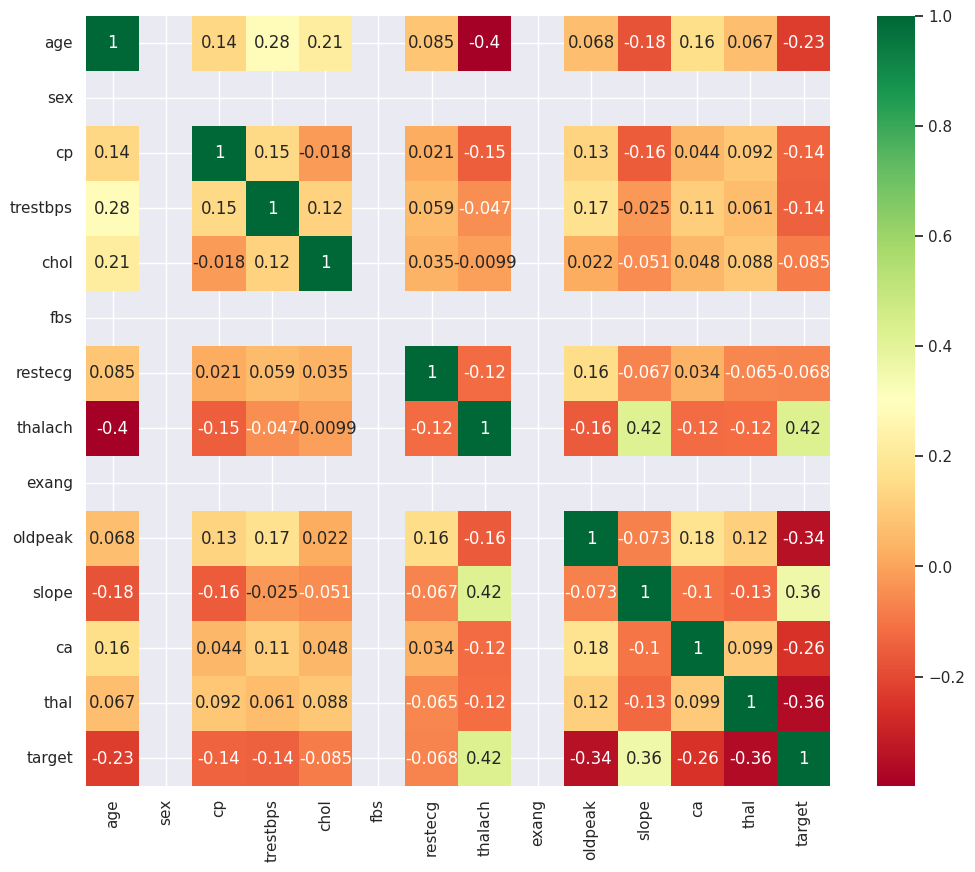

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(heart_data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,1.0,1.985507,134.398551,251.086957,1.0,1.021739,139.101449,1.0,1.839130,1.34058,1.492754,2.557971
1,52.496970,1.0,1.848485,129.303030,242.230303,1.0,1.006061,158.466667,1.0,1.210909,1.70303,1.151515,2.133333


In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63  1.0  3.0       145   233  1.0      1.0      150    1.0      2.3   
1     37  1.0  2.0       130   250  1.0      1.0      187    1.0      3.5   
2     41  1.0  1.0       130   204  1.0      1.0      172    1.0      1.4   
3     56  1.0  1.0       120   236  1.0      1.0      178    1.0      0.8   
4     57  1.0  2.0       120   354  1.0      1.0      163    1.0      0.6   
..   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
298   57  1.0  2.0       140   241  1.0      1.0      123    1.0      0.2   
299   45  1.0  3.0       110   264  1.0      1.0      132    1.0      1.2   
300   68  1.0  2.0       144   193  1.0      1.0      141    1.0      3.4   
301   57  1.0  2.0       130   131  1.0      1.0      115    1.0      1.2   
302   57  1.0  1.0       130   236  1.0      1.0      174    1.0      1.4   

     slope   ca  thal  
0      2.0  1.0   1.0  
1      2.0  1.0   2.0  
2  

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
#Now after building the model let’s check the accuracy of the model on the training dataset.

rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(Y_train, rfc_train)))


from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(Y_test, predictions)))


Accuracy_Score = 1.0
Accuracy_Score = 0.7213114754098361


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8016528925619835


In [ ]:
# accuracy score on the test data
#SVM
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7868852459016393


In [ ]:

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(Y_test,predictions)))

Accuracy Score = 0.7213114754098361


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop('target', axis=1), heart_data['target'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier on the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 80.33%


In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8016528925619835


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.5737704918032787


In [ ]:
filename = 'trained_model_heart_disease.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
